In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

1. Шахматы
2. Броуновское движение частиц: при движении частица влияет на другие, действия которых в будущем зависят от ее текущего действия
3. * $r(s_{t}, a_{t}) = \mathbb{E}[R_{t+1}|S_t = s_t, A_t = a_t] = \sum_{s_{t+1}}\sum_{r_{t+1}}r_{t+1}\cdot p(s_{t+1}, r_{t+1}|s_t, a_t)$
   * $p(s_{t+1} | s_t, a_t) = \Pr\{S_{t+1} = s_{t+1} | S_t = s_t, A_t = a_t \} = \sum_{r_{t+1}}p(s_{t+1}, r_{t+1}|s_t, a_t)$
   * $r(s_t, a_t, s_{t+1}) = \mathbb{E}[R_{t+1}|S_{t+1} = s_{t+1}, S_t = s_t, A_t = a_t]= \sum_{r_{t+1}}r_{t+1}\cdot \frac{p(s_{t+1}, r_{t+1}|s_t,a_t)}{p(s_{t+1} | s_t, a_t)}$

In [79]:
states_cnt = 100
actions_cnt = 2
rewards_cnt = 2

In [80]:
class Environment:
    def __init__(self):
        self.p = np.zeros((states_cnt, actions_cnt, states_cnt, rewards_cnt))
        for s in range(states_cnt):
            if s == 0:
                self.p[s][0][s][0] = 1
                self.p[s][1][s + 1][0] = 1
            elif s == 99:
                self.p[s][0][s - 1][0] = 1
                self.p[s][1][s][1] = 1
            else:
                self.p[s][0][s - 1][0] = 1
                self.p[s][1][s + 1][0] = 1
        self.state = 0
    
    def make_action(self, action):
        if action == 0:
            if self.state != 0:
                self.state -= 1
            return 0
        else:
            if self.state == 99:
                return 1
            else:
                self.state += 1
                return 0
            
    def get_probability(self, s_new, reward, s, a):
        if s_new in range(states_cnt) and reward in range(2):
            return self.p[s][a][s_new][reward]
        else:
            return 0
        
    def get_state(self):
        return self.state

In [109]:
class PolicyIterationStrategy:
    def __init__(self, depth, env):
        self.v = np.random.uniform(0, 1, (states_cnt))
        self.q = np.random.uniform(0, 1, (states_cnt, 2))
        self.env = env
        self.depth = depth
        
    def calc_q(self, s, a):
        ans = 0
        for reward in range(rewards_cnt):
            s_new = s - 1 + a * 2
            s_new = min(s_new, 99)
            s_new = max(s_new, 0)
            ans += self.env.get_probability(s_new, reward, s, a) * (reward + self.depth * self.v[s_new])
        return ans
    
    def update(self):
        delta = 1
        while delta > 1e-80:
            delta = 0
            v = np.zeros(states_cnt)
            for state in range(states_cnt):
                for action in range(actions_cnt):
                    self.q[state][action] = self.calc_q(state, action)
                v[state] = np.max(self.q[state])
            delta = np.max(self.v - v)
            self.v = v
    
    def choose_action(self):
        s = self.env.get_state()
        return np.argmax(self.q[s])
    
    def run(self):
        full_reward = 0
        hist = []
        for t in range(1000):
            a = self.choose_action()
            reward = self.env.make_action(a)
            full_reward += reward
            hist.append(full_reward)
            self.update()
        return np.array(hist)
        

900


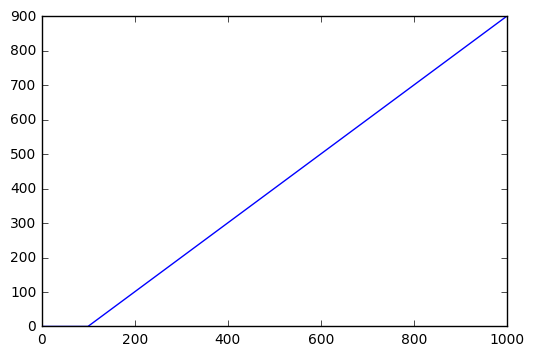

In [110]:
env = Environment()
depth = 0.5
st1 = PolicyIterationStrategy(depth, env)
hist = st1.run()

print(hist.max())
plt.plot(hist)
plt.show()

In [ ]:
class ValueInterationStrategy:
    def __init__(self):
        self.v = np.random.uniform(0, 1, (states_cnt))
        self.q = np.random.uniform(0, 1, (states_cnt, 2))
        
    def update(self):
        v_new = np.zeros((states_cnt))
        for s in range(states_cnt):
            v_new[s] = 